# 5

In [ ]:
import pandas
from sklearn import linear_model
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pandas.read_csv("/content/q5.csv")

In [ ]:
def find_coefficients(data,feature_cols,train_percent):
  X=data[feature_cols]
  y=data['rent']
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1-(train_percent/100),train_size=train_percent/100)
  linreg=LinearRegression(fit_intercept=True)
  linreg.fit(X_train,y_train)
  y_pred=linreg.predict(X_test)
  X_test["extra"]=[1 for i in range(len(X_test))]
  x=X_test[["extra"]+feature_cols].to_numpy()
  y=np.array(y_test).reshape(len(y_test),1)
  sse=np.sum(y_test-y_pred)**2
  return (list(np.dot(np.linalg.pinv(x),y)),sse)

In [ ]:
def print_line(coeff):
  n=len(coeff)
  s=str(round(coeff[0][0],5))
  for i in range(1,n):
    k=round(coeff[i][0],5)
    sign="+" if k>=0 else "-"
    s+=(sign+str(abs(k))+" x_"+str(i)+" ")
  return s

# 5 - A

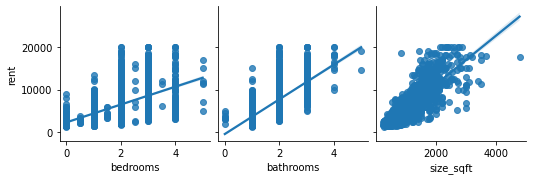

In [ ]:
sns.pairplot(df,x_vars=['bedrooms', 'bathrooms','size_sqft'],y_vars='rent',kind='reg')

In [ ]:
feature_cols=["bedrooms","bathrooms","size_sqft"]
coeff,sse = find_coefficients(data,feature_cols,80)
print("The line equation is",print_line(coeff))
print("SSE :",sse)

The line equation is -573.51878-262.63748 x_1 +1499.45696 x_2 +4.2147 x_3 
SSE : 2278542358.1288705


# 5 - B

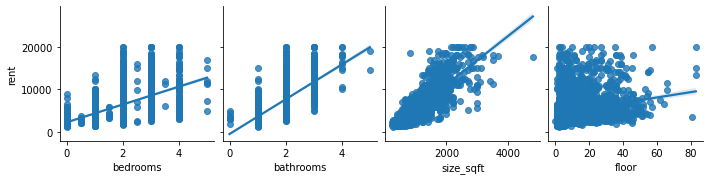

In [ ]:
sns.pairplot(data,x_vars=['bedrooms', 'bathrooms','size_sqft','floor'],y_vars='rent',kind='reg')

In [ ]:
feature_cols=['bedrooms', 'bathrooms','size_sqft','floor']
coeff,sse = find_coefficients(data,feature_cols,80)
coeff,sse
print("The line equation is",print_line(coeff))
print("SSE :",sse)

The line equation is -880.64264-290.90836 x_1 +805.69194 x_2 +5.02443 x_3 +42.54454 x_4 
SSE : 4035182859.8258357


# 5 - C

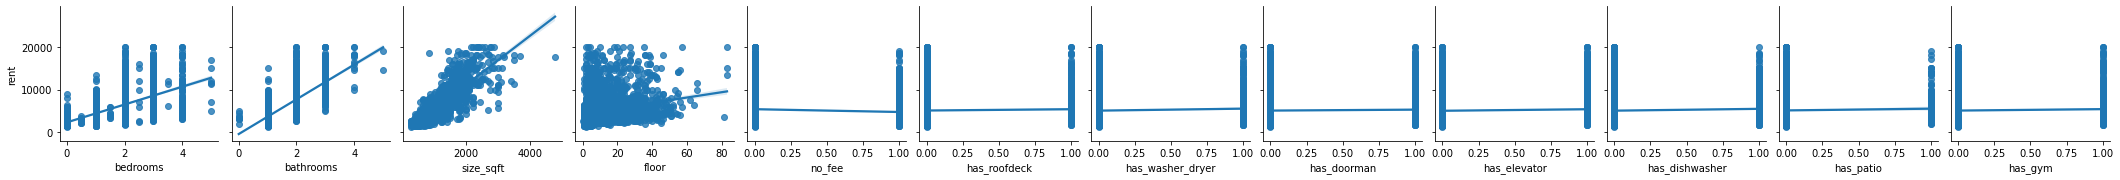

In [ ]:
sns.pairplot(df,x_vars=['bedrooms', 'bathrooms','size_sqft','floor','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym'],y_vars='rent',kind='reg')

In [ ]:
feature_cols=['bedrooms', 'bathrooms','size_sqft','floor','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']
coeff,sse = find_coefficients(data,feature_cols,80)
coeff,sse
print("The line equation is",print_line(coeff))
print("SSE :",sse)

The line equation is -1132.81139-405.45912 x_1 +1096.50983 x_2 +5.31541 x_3 +28.06501 x_4 -16.22691 x_5 +107.63159 x_6 +272.02113 x_7 -317.0956 x_8 +74.20532 x_9 +13.40856 x_10 +209.11694 x_11 +245.35899 x_12 
SSE : 2334877870.9322534


# 5 - D

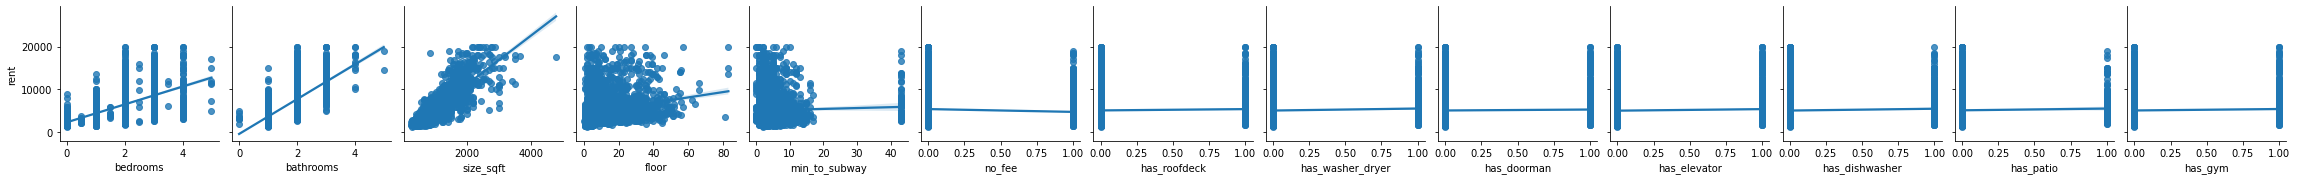

In [ ]:
sns.pairplot(df,x_vars=['bedrooms', 'bathrooms','size_sqft','floor','min_to_subway','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym'],y_vars='rent',kind='reg')

In [ ]:
feature_cols=['bedrooms', 'bathrooms','size_sqft','floor','min_to_subway','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']
coeff,sse = find_coefficients(data,feature_cols,80)
coeff,sse
print("The line equation is",print_line(coeff))
print("SSE :",sse)

The line equation is -1110.97408-287.45442 x_1 +1404.68634 x_2 +4.49908 x_3 +29.13163 x_4 +3.81272 x_5 +15.69662 x_6 -277.41389 x_7 +133.84068 x_8 -43.05253 x_9 +285.03322 x_10 +196.68665 x_11 +284.60405 x_12 -10.18475 x_13 
SSE : 218451794.15140978


Manhattan is one of the busiest places in the united states. Most People in Manhattan travel to work through subways, and we feel that people would show more interest  to buy houses near subway as it would take short time for them to reach the subway and travel to work. Hence we have considered Mins to Subway column as a part of task-d.   

# 5 - E

In all the cases the SSE value is very very high indicating that we can’t considered all those columns for making predictions. In all the above 4 tasks only the 1st task has less values  compared with other values. 